# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Laura Gagnon-Vos
#### GitHub: https://github.com/lauravos/web-scraping 

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [2]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                   Version
------------------------- --------------
annotated-types           0.6.0
anyio                     4.3.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.14.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blis                      0.7.11
catalogue                 2.0.10
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
cloudpathlib              0.16.0
colorama                  0.4.6
comm                      0.2.2
confection                0.1.4
contourpy                 1.2.1
cycler                    0.12.1
cymem                     2.0.8
debugpy                   1.8.1
decorator                 5.1.1
defusedxml                0.7.1
en-core-web-sm            3.7.1
executing       

## Question 1
1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [3]:
#get article 
url = 'https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/'
response = requests.get(url)

print(response.status_code)
print(response.headers['content-type'])
#print(response.text)

#Parse HTML
soup = BeautifulSoup(response.text, 'html.parser')

article_text = str(soup.find('article'))
## article_html = response.text

#dump to pkl file
with open('article.pkl', 'wb') as file:
    pickle.dump(article_text, file)

200
text/html; charset=UTF-8


## Question 2
2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [4]:
#open and read pkl file
with open('article.pkl', 'rb') as file:
    article_html = pickle.load(file)

#parse HTML
soup = BeautifulSoup(article_html, 'html.parser')

#extract text with .get_text()
article_text = soup.get_text()

#print article text
print(article_text)



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

## Question 3
3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [52]:

nlp = spacy.load('en_core_web_sm')
doc = nlp(article_text)

#filter out tokens that are punctuation, stopwords, and whitespaces
tokens = [token.text.lower() for token in doc 
          if not token.is_punct
          and not token.is_stop 
          and not token.is_space]
#get token frequency
freq = Counter(tokens)

#get 5 most frequent tokens
most_common_tokens = freq.most_common(5)


#print 5 most common tokens and frequencies
print('Most common tokens and their frequencies: ')
for tokens, frequency in most_common_tokens:
    print(f'{tokens} : {frequency}')
    
print()

#print all tokens and frequencies
print('All tokens and their frequencies: ')
for tokens, frequency in freq.items():
    print(f'{tokens} : {frequency}')

Most common tokens and their frequencies: 
laser : 35
headlights : 19
headlight : 11
technology : 10
led : 10

All tokens and their frequencies: 
laser : 35
headlights : 19
work : 2
130 : 1
comments : 1
lewin : 1
day : 3
march : 2
22 : 1
2021 : 1
think : 1
onward : 1
automotive : 6
technology : 10
usually : 1
thing : 2
come : 5
mind : 3
engines : 1
fuel : 1
efficiency : 3
switch : 2
electric : 1
power : 3
mean : 1
thousands : 1
engineers : 2
world : 2
working : 1
improve : 1
state : 2
art : 1
lighting : 4
sealed : 2
beam : 7
gave : 1
way : 4
modern : 2
designs : 3
regulations : 1
loosened : 1
bulbs : 1
moved : 2
simple : 3
halogens : 1
xenon : 1
hids : 1
recently : 1
leds : 6
new : 3
scene : 1
lasers : 5
bwm : 2
prototype : 1
headlight : 11
assemblies : 1
undergoing : 1
testing : 1
image : 2
brought : 1
phrase : 1
beams : 5
firing : 1
automobile : 1
obviously : 1
coherent : 1
monochromatic : 1
light : 9
poor : 1
illumination : 2
outside : 1
specific : 1
spot : 2
distance : 1
away : 1
t

## Question 4
4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [55]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(article_text)

#lemmatize and filter out tokens that are punctuation, stopwords, and whitespaces
lemmas = [token.lemma_.lower() for token in doc 
          if not token.is_punct
          and not token.is_stop 
          and not token.is_space]
#get lemma frequency
lfreq = Counter(lemmas)

#get 5 most frequent tokens
most_common_lemmas = lfreq.most_common(5)


#print 5 most common tokens and frequencies
print('Most common lemmas and their frequencies: ')
for lemmas, frequency in most_common_lemmas:
    print(f'{lemmas} : {frequency}')
    
print()

#print all tokens and frequencies
print('All lemmas and their frequencies: ')
for lemmas, frequency in lfreq.items():
    print(f'{lemmas} : {frequency}')

Most common lemmas and their frequencies: 
laser : 40
headlight : 28
beam : 12
technology : 10
light : 10

All lemmas and their frequencies: 
laser : 40
headlights : 2
work : 3
130 : 1
comments : 1
lewin : 1
day : 4
march : 2
22 : 1
2021 : 1
think : 1
onward : 1
automotive : 6
technology : 10
headlight : 28
usually : 1
thing : 3
come : 7
mind : 3
engine : 1
fuel : 1
efficiency : 3
switch : 2
electric : 1
power : 3
mean : 2
thousand : 1
engineer : 2
world : 2
improve : 1
state : 2
art : 1
lighting : 4
seal : 1
beam : 12
give : 1
way : 4
modern : 2
design : 6
regulation : 1
loosen : 1
bulb : 1
move : 2
simple : 3
halogen : 1
xenon : 1
hids : 1
recently : 1
led : 7
new : 3
scene : 1
bwm : 2
prototype : 1
assembly : 2
undergo : 1
testing : 1
image : 2
bring : 2
phrase : 1
fire : 2
automobile : 2
obviously : 1
coherent : 1
monochromatic : 1
light : 10
poor : 1
illumination : 2
outside : 1
specific : 1
spot : 2
distance : 1
away : 1
thankfully : 2
eye : 1
instead : 1
consist : 1
solid : 1
di

## Question 5
5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [68]:
# score_sentence_by_token(sentence, interesting_token)
def score_sentence_by_token(sentence, interesting_token):
    doc = nlp(sentence)
    tokens = [token.text.lower() for token in doc 
          if not token.is_punct
          and not token.is_stop 
          and not token.is_space]
    score = sum(token in interesting_token for token in tokens) / len(tokens) 
    return score


#score_sentence_by_lemma(sentence, interesting_lemmas)
def score_sentence_by_lemma(sentence, interesting_lemma):
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc 
          if not token.is_punct
          and not token.is_stop 
          and not token.is_space]
    score = sum(lemma in interesting_lemma for lemma in lemmas) / len(lemmas) 
    return score

#get first sentence
first_sentence = next(doc.sents).text

#list most common tokens and lemmas
most_common_tokens = ['laser', 'headlights', 'headlight', 'technology', 'led']
most_common_lemmas = ['laser', 'headlight', 'beam', 'technology', 'light']

#score first sentence
tokenscore = score_sentence_by_token(first_sentence, most_common_tokens)
lemmascore = score_sentence_by_lemma(first_sentence, most_common_lemmas)

print(f'First sentence token score is {tokenscore}')
print(f'First sentence lemma score is {lemmascore}')


First sentence token score is 0.2
First sentence lemma score is 0.1


## Question 6
6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

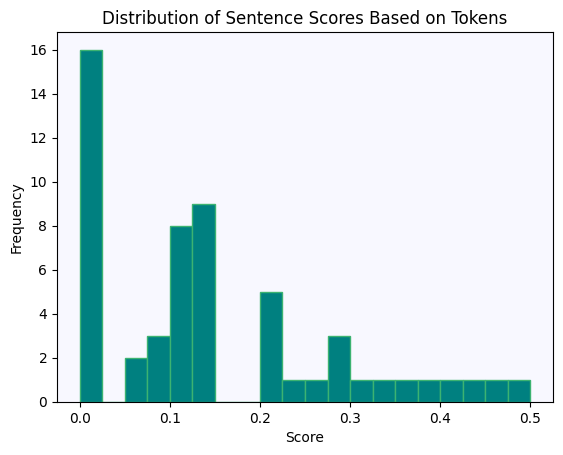

In [106]:
#score every sentence 
sentence_scores = [score_sentence_by_token(sentence.text, most_common_tokens) for sentence in doc.sents]

#histogram
plt.hist(sentence_scores, color='teal', edgecolor='mediumseagreen', bins=20 )
plt.title('Distribution of Sentence Scores Based on Tokens')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.gca().set_facecolor('ghostwhite')

#From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?
 #Scores tend to range lower, with the majority being under 0.1

## Question 7
7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

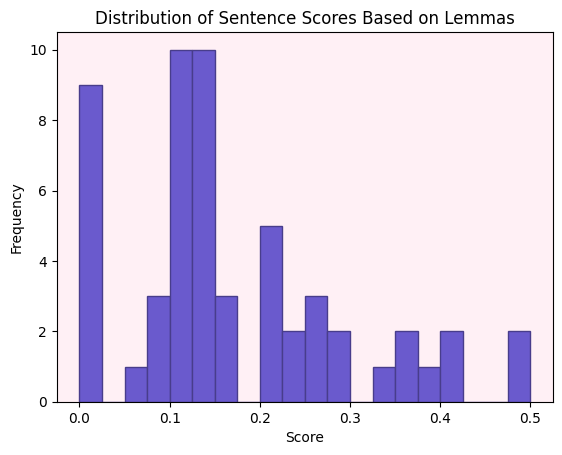

In [107]:
#score every sentence 
sentence_scores = [score_sentence_by_lemma(sentence.text, most_common_lemmas) for sentence in doc.sents]

#histogram
plt.hist(sentence_scores, color='slateblue', edgecolor='darkslateblue', bins=20 )
plt.title('Distribution of Sentence Scores Based on Lemmas')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.gca().set_facecolor('lavenderblush')

#From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?
 #Scores for lemmas per sentence vary a bit more than for tokens, but their range is mostly lower(between approximately 0.0 and 0.15)

## Question 8
8. Which tokens and lexems would be omitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

Of the words deemed 'interesting' from questions 3 and 4, the majority, if not all, would likely remain, since they typically function as nouns in context of that webpage. 
In order to only consider nouns, we need to specify that we want to filter for that in the code. We could achieve that with POS tagging

For tokens(question 3):  
tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space and token.pos_=='NOUN']

For lemmas(question 4): 
lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space and token.pos_=='NOUN']


In [108]:
!jupyter nbconvert --to html web-scraping.ipynb 

[NbConvertApp] Converting notebook web-scraping.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 373395 bytes to web-scraping.html
